In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import random
import matplotlib.pyplot as plt
#from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
%matplotlib inline
from keras_preprocessing.image import ImageDataGenerator, load_img





Using TensorFlow backend.


In [2]:
import os
print(os.listdir("/Users//sidgupta//Downloads/MURA-v1.1 3//train"))

['.DS_Store', 'XR_ELBOW', 'XR_FINGER', 'XR_FOREARM', 'XR_HAND', 'XR_HUMERUS', 'XR_SHOULDER', 'XR_WRIST']


In [3]:
data = pd.read_csv("/Users//sidgupta//Downloads//train_image_paths.csv")
data
del data['Unnamed: 1']


In [4]:
data.head()

,path
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...


In [5]:
category = []
for n in range(0,36808):
    if 'positive' in data.path[n]:
        category.append('yes')
    else:
        category.append('no')
    n=n+1    


data1={'category':category}
df = pd.DataFrame(data1)
df.head()

,category
0,yes
1,yes
2,yes
3,yes
4,yes


In [6]:
train_data = pd.concat([data, df], axis=1, sort=False)
train_data.head()

,path,category
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,yes
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,yes
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,yes
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,yes
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,yes


In [7]:
wrist = []
for n in range(0,36808):
    if 'WRIST' in data.path[n]:
        wrist.append(data.path[n])
    n=n+1    


data1={'wrist_path':wrist}
wrist = pd.DataFrame(data1)
wrist.head()

,wrist_path
0,MURA-v1.1/train/XR_WRIST/patient06359/study1_p...
1,MURA-v1.1/train/XR_WRIST/patient06359/study1_p...
2,MURA-v1.1/train/XR_WRIST/patient06360/study1_p...
3,MURA-v1.1/train/XR_WRIST/patient06360/study1_p...
4,MURA-v1.1/train/XR_WRIST/patient06360/study1_p...


In [8]:
category = []
for n in range(0,9752):
    if 'positive' in wrist.wrist_path[n]:
        category.append('yes')
    else:
        category.append('no')
    n=n+1    


data1={'category':category}
df = pd.DataFrame(data1)
df.head()

,category
0,yes
1,yes
2,yes
3,yes
4,yes


In [9]:
train_wristdata = pd.concat([wrist, df], axis=1)#, sort=False)
train_wristdata.head()

,wrist_path,category
0,MURA-v1.1/train/XR_WRIST/patient06359/study1_p...,yes
1,MURA-v1.1/train/XR_WRIST/patient06359/study1_p...,yes
2,MURA-v1.1/train/XR_WRIST/patient06360/study1_p...,yes
3,MURA-v1.1/train/XR_WRIST/patient06360/study1_p...,yes
4,MURA-v1.1/train/XR_WRIST/patient06360/study1_p...,yes


In [10]:
x_train=train_data['path']
y_train=train_data['category']

In [11]:
valid_data1 = pd.read_csv("/Users//sidgupta//Documents//valid_image_paths.csv")
valid_data1.head()

,path
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
1,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
2,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
3,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
4,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...


In [12]:
path = []
for n in range(0,3197):
    if 'WRIST' in valid_data1.path[n]:
        path.append(valid_data1.path[n])
    n=n+1    


data1={'path':path}
df = pd.DataFrame(data1)
df.head()

,path
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
1,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
2,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
3,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
4,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...


In [13]:
category = []
for n in range(0,659):
    if 'positive' in df.path[n]:
        category.append('yes')
    else:
        category.append('no')
    n=n+1    


data1={'category':category}
df1 = pd.DataFrame(data1)
df1.head()

,category
0,yes
1,yes
2,yes
3,yes
4,yes


In [14]:
valid_wristdata = pd.concat([df, df1], axis=1)#, sort=False)
valid_wristdata.head()

,path,category
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,yes
1,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,yes
2,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,yes
3,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,yes
4,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,yes


In [15]:
category = []
for n in range(0,3197):
    if 'positive' in valid_data1.path[n]:
        category.append('yes')
    else:
        category.append('no')
    n=n+1    


data1={'category':category}
df = pd.DataFrame(data1)
df.head()

,category
0,yes
1,yes
2,yes
3,yes
4,yes


In [16]:
valid_data = pd.concat([valid_data1, df], axis=1, sort=False)
valid_data.head()

,path,category
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,yes
1,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,yes
2,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,yes
3,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,yes
4,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,yes


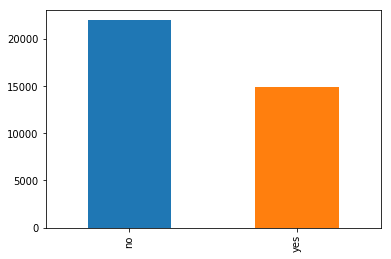

In [17]:
train_data['category'].value_counts().plot.bar()


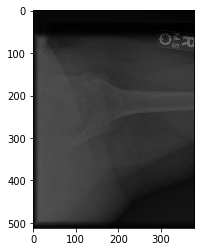

In [18]:
image = load_img("/Users//sidgupta//Downloads//"+"MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image1.png")
plt.imshow(image)

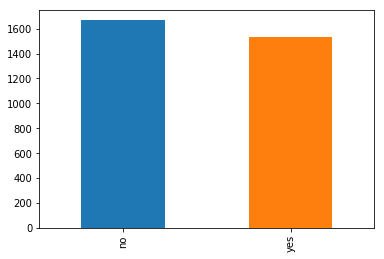

In [19]:
valid_data['category'].value_counts().plot.bar()



In [20]:
total_train = train_wristdata.shape[0]
total_validate = valid_wristdata.shape[0]
batch_size=200
total_train

9752

In [21]:
from keras.models import Sequential,model_from_json
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

In [22]:
image_width = 256
image_height = 256
image_size = (image_width, image_height)
image_channel = 3

In [23]:
classifier1 = Sequential()
classifier1.add(Conv2D(32,(2,2),input_shape = (image_width,image_height,image_channel),activation = 'relu'))
classifier1.add(BatchNormalization())
classifier1.add(MaxPooling2D(pool_size = (2,2)))
                
classifier1.add(Conv2D(32,(2,2),activation = 'relu'))
classifier1.add(BatchNormalization())
classifier1.add(MaxPooling2D(pool_size = (2,2)))
                
classifier1.add(Flatten())
classifier1.add(Dense(256,activation = 'relu'))
classifier1.add(Dense(units = 1, activation = 'sigmoid'))
classifier1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [24]:
classifier1.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 255, 255, 32)      416       
_________________________________________________________________
batch_normalization_1 (Batch (None, 255, 255, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 32)      4128      
_________________________________________________________________
batch_normalization_2 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 127008)            0         
__________

In [25]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [26]:
train_datagen = ImageDataGenerator(
    #rotation_range=0,
    rescale=1./255,
    #shear_range=0.2,
    zoom_range=0,
    horizontal_flip=False,
    width_shift_range=0.1,
    height_shift_range=0.1,
    #preprocessing_function=rgb2gray
)

In [27]:
train_generator = train_datagen.flow_from_dataframe(
dataframe=train_wristdata,
directory="/Users//sidgupta//Downloads//",
x_col='wrist_path',
y_col='category',
class_mode='binary',
batch_size=100,
shuffle=False
)

Found 9752 images belonging to 2 classes.


In [28]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    valid_wristdata, 
    "/Users//sidgupta//Downloads//", 
    x_col='path',
    y_col='category',
    class_mode='binary',
    batch_size=100,
    shuffle=False
)

Found 659 images belonging to 2 classes.


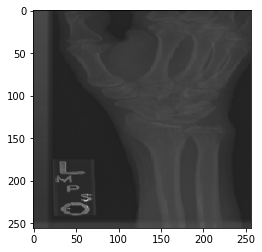

In [29]:
x,y = train_generator.next()
#for i in range(0,1):
random_image = x[6]
plt.imshow(random_image)
plt.show()

In [30]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)

In [31]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [ ]:
history = classifier1.fit_generator(
    train_generator, 
    epochs= 25,
    validation_data=validation_generator,
    validation_steps=total_validate//20,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/25
48/48 [==============================] - 1694s 35s/step - loss: 6.8653 - acc: 0.5575 - val_loss: 7.8305 - val_acc: 0.5142